In [1]:
# from google.colab import drive
# drive.mount('/content/GoogleDrive')

In [9]:
!pip install split-folders
!pip install imutils
!pip install pydot
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00


In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss, classification_report
from sklearn.model_selection import train_test_split
from imutils import paths

import matplotlib.pyplot as plt
import seaborn as sb
import splitfolders
import cv2
import random

In [2]:
# inputFolder = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/Brain Cancer'
# outputFolder = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/dataset'
outputFolder = 'C:\\Users\\mooha\\jupyter\\Selected2 Project\\dataset'
outputFolder = 'D:\\Z - PC\\Computer Science\\level 4\\Selected 2 (Deep Learning)\\Project\\Brain Cancer'

In [5]:
# splitfolders.ratio(inputFolder, outputFolder, seed = 44, ratio = (0.8, 0.0, 0.2))

In [22]:
imgPaths = list(paths.list_images(outputFolder))
print(imgPaths[0].split('\\'))

random.shuffle(imgPaths)

classes = [] # classes = ['brain_tumor', 'brain_menin', 'brain_glioma']
for imgPath in imgPaths:
  className = imgPath.split('\\')[-2]

  if className not in classes:
    classes.append(className)

#print(classes)

X_train = []
y_train = []

X_test = []
y_test = []

IMGSIZE = 128
img_names = []

for imgPath in imgPaths:
  trainOrTest = imgPath.split('\\')[-3]
  className = imgPath.split('\\')[-2]

  img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  if trainOrTest == 'train':
    X_train.append(img)
    y_train.append(classes.index(className))
    img_names.append(imgPath.split('\\')[-1])

  elif trainOrTest == 'test':
    X_test.append(img)
    y_test.append(classes.index(className))

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

['C:', 'Users', 'mooha', 'jupyter', 'Selected2 Project', 'dataset', 'test', 'brain_glioma', 'brain_glioma_0001.jpg']
12000 12000
3000 3000


In [6]:
imgPaths = list(paths.list_images(outputFolder))
print(imgPaths[0].split('\\'))

random.shuffle(imgPaths)

classes = [] # classes = ['brain_tumor', 'brain_menin', 'brain_glioma']
for imgPath in imgPaths:
  className = imgPath.split('\\')[-2]

  if className not in classes:
    classes.append(className)

# print(classes)

X = []
y = []

IMGSIZE = 256
img_names = []

for imgPath in imgPaths:
  className = imgPath.split('\\')[-2]

  img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  X.append(img)
  y.append(classes.index(className))
  img_names.append(imgPath.split('\\')[-1])

print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

['C:', 'Users', 'mooha', 'jupyter', 'Selected2 Project', 'dataset', 'test', 'brain_glioma', 'brain_glioma_0001.jpg']
15000 15000


In [8]:
df = pd.DataFrame({
    'File Name' : img_names,
    'Category' : y # y_train
})

# print(classes.index('brain_tumor'))
# print(classes.index('brain_glioma'))
# print(classes.index('brain_menin'))

print(classes)
df.head()

['brain_glioma', 'brain_tumor', 'brain_menin']


,File Name,Category
0,brain_glioma_4299.jpg,0
1,brain_glioma_4855.jpg,0
2,brain_tumor_2239.jpg,1
3,brain_tumor_1568.jpg,1
4,brain_menin_1517.jpg,2


<Axes: ylabel='count'>

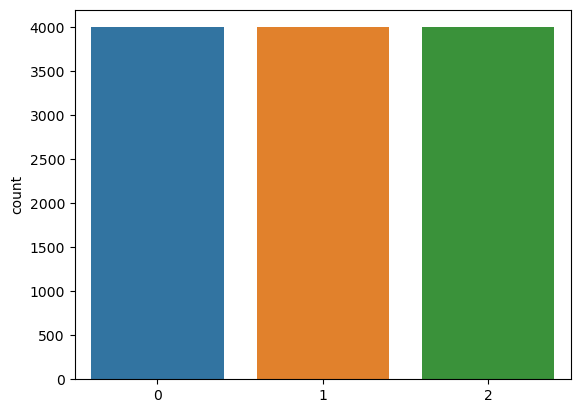

In [36]:
sb.countplot(x = y_train)

<Axes: ylabel='count'>

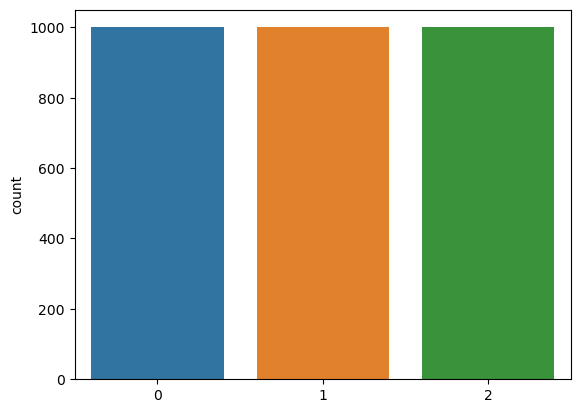

In [37]:
sb.countplot(x = y_test)

In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12000, 128, 128, 3) (12000,)
(3000, 128, 128, 3) (3000,)


In [29]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMGSIZE, IMGSIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25)
# val_loss, val_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/25
375/375 [==============================] - 88s 232ms/step - loss: 0.8153 - accuracy: 0.6472 - val_loss: 0.7140 - val_accuracy: 0.6620
Epoch 2/25
375/375 [==============================] - 92s 245ms/step - loss: 0.5021 - accuracy: 0.8023 - val_loss: 0.3752 - val_accuracy: 0.8737
Epoch 3/25
375/375 [==============================] - 95s 253ms/step - loss: 0.3793 - accuracy: 0.8582 - val_loss: 0.3244 - val_accuracy: 0.8897
Epoch 4/25
375/375 [==============================] - 95s 253ms/step - loss: 0.2648 - accuracy: 0.9027 - val_loss: 0.2143 - val_accuracy: 0.9257
Epoch 5/25
375/375 [==============================] - 95s 253ms/step - loss: 0.2215 - accuracy: 0.9202 - val_loss: 0.2357 - val_accuracy: 0.9057
Epoch 6/25
375/375 [==============================] - 101s 269ms/step - loss: 0.1867 - accuracy: 0.9310 - val_loss: 0.3846 - val_accuracy: 0.8330
Epoch 7/25
375/375 [==============================] - 101s 270ms/step - loss: 0.1655 - accuracy: 0.9399 - val_loss: 0.1477 - val_

In [43]:
model.save('C:\\Users\\mooha\\jupyter\\Selected2 Project\\model4.h5')
# new_model = model.load_weights('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/model.h5')
# new_model = model.load_weights('C:\\Users\\mooha\\jupyter\\Selected2 Project\\model3.h5')

In [7]:
plot_model(model, to_file = 'cnn_model.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


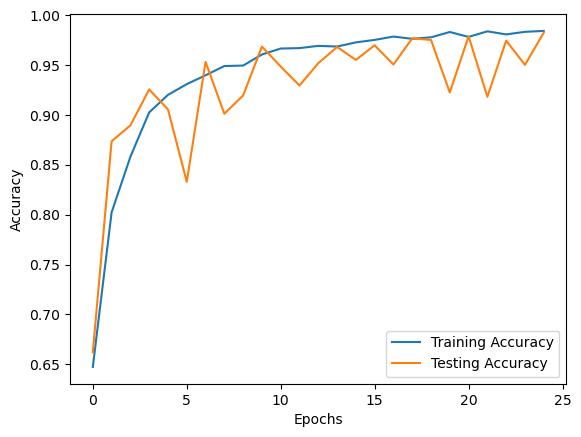

In [30]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

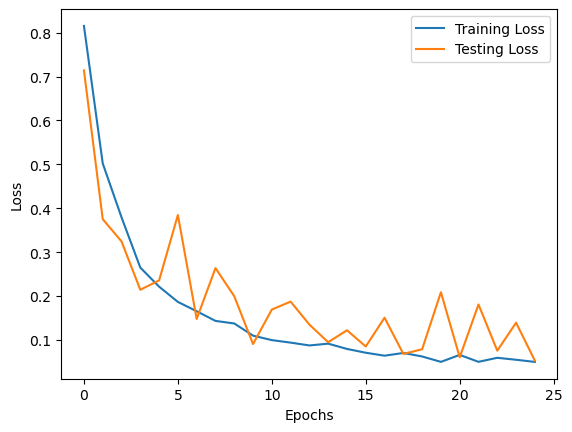

In [31]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
print(classes)
print(y_test[:25], '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(3000): #len(y_pred)
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, predict)
print(cr)

['brain_glioma', 'brain_tumor', 'brain_menin']
[0 2 1 2 1 1 2 2 2 1 2 2 2 1 0 0 2 2 1 1 2 2 2 1 0] 

[[9.99999940e-01 1.28889086e-19 4.46569788e-15]
 [3.61539098e-03 4.67122009e-05 9.96337891e-01]
 [2.18661245e-09 9.99999940e-01 3.49096752e-08]
 [2.01527681e-02 9.13729251e-04 9.78933394e-01]
 [1.97338904e-05 9.99909103e-01 7.10305249e-05]
 [9.66030029e-07 9.99982774e-01 1.62020060e-05]
 [3.69560450e-01 6.09975960e-03 6.24339938e-01]
 [1.23744339e-01 1.94846187e-02 8.56771171e-01]
 [2.26447284e-01 3.01810186e-02 7.43371725e-01]
 [2.52056308e-03 8.14671099e-01 1.82808340e-01]
 [2.95153266e-04 1.55916959e-02 9.84113097e-01]
 [1.46149631e-07 4.53997236e-05 9.99954402e-01]
 [2.67554068e-08 1.68809744e-10 9.99999940e-01]
 [1.55818634e-05 9.99818563e-01 1.65740072e-04]
 [9.99999940e-01 4.74481600e-11 4.98758257e-10]
 [9.99999940e-01 1.36918475e-17 1.65135597e-18]
 [1.30255517e-04 2.62149188e-05 9.99843597e-01]
 [1.49582736e-02 4.43685771e-04 9.84597981e-01]
 [4.21834047e-05 9.98439789e-01 1.5

<Figure size 500x500 with 0 Axes>

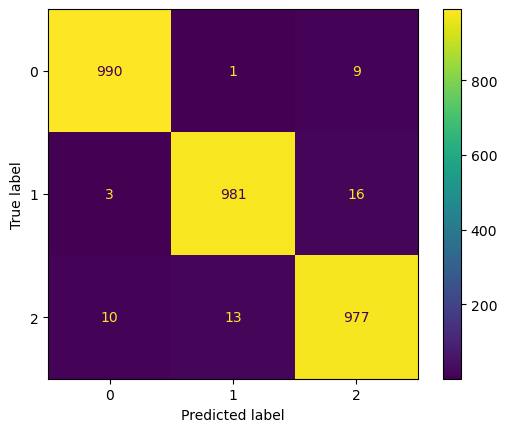

In [33]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

<Axes: ylabel='count'>

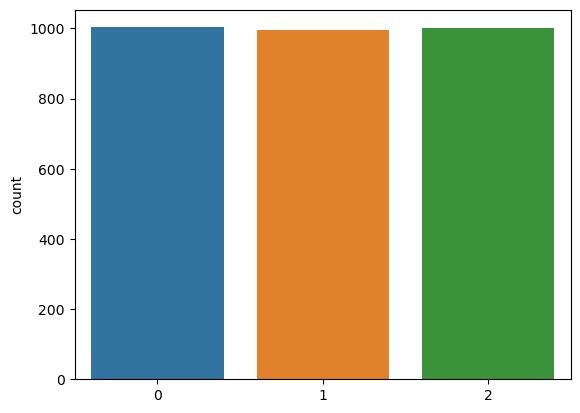

In [40]:
sb.countplot(x = predict)

1/1 [==============================] - 0s 22ms/step
[[3.4636215e-03 3.5137849e-04 9.9618500e-01]]
['brain_glioma', 'brain_tumor', 'brain_menin']


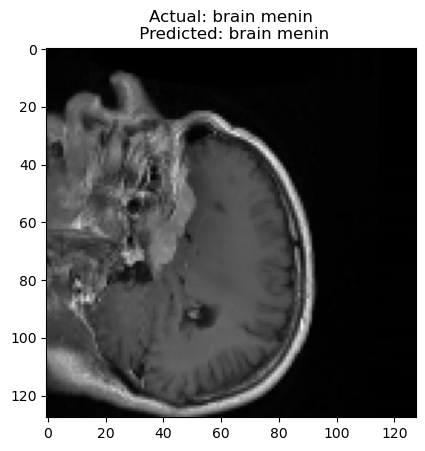

In [42]:
test_img_path = 'C:\\Users\\mooha\\jupyter\\Selected2 Project\\dataset\\test\\brain_menin\\brain_menin_0089.jpg'
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (IMGSIZE,IMGSIZE))

plt.imshow(test_img)

test_img = test_img[tf.newaxis, ...]
test_predict = model.predict(test_img)

str1 = test_img_path.split('\\')[-1].split('_')[0]
str2 = test_img_path.split('\\')[-1].split('_')[1]
str3 = classes[np.argmax(test_predict)].split('_')[0] + ' ' + classes[np.argmax(test_predict)].split('_')[1]

plt.title('Actual: ' + str1 + ' ' + str2 + '\n Predicted: ' + str3)

print(test_predict)
print(classes)
plt.show()